In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', None)

In [41]:
master= pd.read_csv('../data/master.csv')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (105,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
master.head()

,id,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PropName,PlatName,PlatLotparcel,PlatBlockparcel,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint
0,200042,3003343,08/02/2019,9796500,20190805001366,,,,,,,SHAH ASSET MANAGEMENT ...,BTC III KENT IC LLC ...,3,7,3,N,N,N,N,1,2,,VACANT BUILDING,ADAMS # 43,POR,POR,4.0,23.0,36.0,SW,C,70.0,40.0,NaN,NaN,KENT,1514.0,M1,13.0,1.0,195.0,152460.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000004,3003032,06/26/2019,0,20190802000413,,,,,,,BRANNAN MARIE L-PR+FREDERICK L ...,BRANNAN FREDERICK L-FT+BRANNAN ERIN-TTEE ...,3,7,19,N,N,N,N,16,2,20 31 45,NORTH AUBURN REHAB & HEALTH CNTR,BRANNAN W # 37,,,5.0,21.0,6.0,SE,C,60.0,35.0,174.0,10.0,AUBURN,133.0,R20,7.0,1.0,59.0,83434.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000042,3018323,10/29/2019,485500,20191031001228,,,,,,,BUTSICK BRANDON P+DANIELLE R ...,MARTIN CURT E+CYNTHIA M ...,11,6,3,N,N,N,N,1,8,,,BRANNAN W # 37,POR,,5.0,21.0,7.0,SE,R,28.0,11.0,NaN,NaN,AUBURN,133.0,R7,1.0,1.0,2.0,6002.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,1424 M ST NE,1424,,,M,ST,NE,NaN,2.0,7.0,0.0,1430.0,0.0,704.0,0.0,0.0,0.0,2134.0,0.0,0.0,0.0,0.0,576.0,N,244.0,0.0,0.0,5.0,3.0,0.0,N,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2016.0,0.0,0.0,0.0,0.0,3.0,0.0,0.238254
3,1000047,2994317,05/15/2019,0,20190618001163,,,,,,,AUBURN SCHOOL DISTRICT 408 ...,AUBURN CITY OF ...,1,7,3,N,N,N,N

In [43]:
# How many records in the dataframe?
records = master.shape[0]
records

62039

In [44]:
# Any duplicate entries?
master.duplicated().sum()

0

In [111]:
master.isnull().sum()

ExciseTaxNbr            0
DocumentDate            0
SalePrice               0
id                      0
RecordingNbr            0
                    ...  
Obsolescence        18201
PcntNetCondition    18201
Condition           18201
AddnlCost           18201
footprint           18201
Length: 151, dtype: int64

In [112]:
cols = list(master.columns)
cols = [cols[3]] + cols[:3] + cols[4:]
master = master[cols]

In [113]:
master_res = master[master.PropertyType.isin([11,12,13,14])]

In [114]:
master_res.head()

,id,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PropName,PlatName,PlatLotparcel,PlatBlockparcel,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint
2,1000042,3018323,10/29/2019,485500,20191031001228,,,,,,,BUTSICK BRANDON P+DANIELLE R ...,MARTIN CURT E+CYNTHIA M ...,11,6,3,N,N,N,N,1,8,,,BRANNAN W # 37,POR,,5.0,21.0,7.0,SE,R,28.0,11.0,NaN,NaN,AUBURN,133.0,R7,1.0,1.0,2.0,6002.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,1424 M ST NE,1424,,,M,ST,NE,NaN,2.0,7.0,0.0,1430.0,0.0,704.0,0.0,0.0,0.0,2134.0,0.0,0.0,0.0,0.0,576.0,N,244.0,0.0,0.0,5.0,3.0,0.0,N,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2016.0,0.0,0.0,0.0,0.0,3.0,0.0,0.238254
7,1000067,3006715,03/18/2019,0,20190823001565,,,,,,,NATIONSTAR MORTGAGE LLC ...,HO KAM SAU ...,11,6,3,N,N,N,N,1,8,,,BRANNAN W # 37,,,5.0,21.0,7.0,SE,R,28.0,11.0,NaN,NaN,AUBURN,133.0,R7,1.0,1.0,2.0,17400.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,1506 I ST NE 98002,1506,,,I,ST,NE,98002,1.0,8.0,0.0,2240.0,0.0,0.0,0.0,0.0,0.0,2240.0,1340.0,0.0,0.0,0.0,480.0,N,170.0,0.0,0.0,6.0,1.0,0.0,,4.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1946.0,0.0,0.0,0.0,0.0,4.0,0.0,0.128736
8,1000067,2979287,03/18/2019,358308,20190327000321,,,,,,,NATIONSTAR MORTGAGE LLC ...,HO KAM SAU ...,11,6,3,N,N,N,N,1,8,,,BRANNAN W # 37,,,5.0,21.0,7.0,SE,R,28.0,11.0,NaN,NaN,AUBURN,133.0,R7,1.0,1.0,2.0,17400.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,1506 I ST NE 98002,1506,,,I,ST,NE,98002,1.0,8.0,0.0,2240.0,0.0,0.0,0.0,0.0,0.0,2240.0,1340.0,0.0,0.0,0.0,480.0,N,170.0,0.0,0.0,6.0,1.0,0.0,,4.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1946.0,0.0,0.0,0.0,0.0,4.0,0.0,0.128736
10,1000087,3025591,12/10/2019,0,20191216000012,,,,,,,STOBIE JOHANNA M ...,STOBIE JOHANNA M ...,12,6,15,N,N,N,N,1,8,,DUPLEX,BRANNAN W # 37,POR,,5.0,21.0,6.0,SE,R,28.0,11.0,NaN,Na

In [128]:
df_sale = master_res[master_res.SalePrice > 0]

In [129]:
df_sale.head()

,id,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PropName,PlatName,PlatLotparcel,PlatBlockparcel,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint
2,1000042,3018323,10/29/2019,485500,20191031001228,,,,,,,BUTSICK BRANDON P+DANIELLE R ...,MARTIN CURT E+CYNTHIA M ...,11,6,3,N,N,N,N,1,8,,,BRANNAN W # 37,POR,,5.0,21.0,7.0,SE,R,28.0,11.0,NaN,NaN,AUBURN,133.0,R7,1.0,1.0,2.0,6002.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,1424 M ST NE,1424,,,M,ST,NE,NaN,2.0,7.0,0.0,1430.0,0.0,704.0,0.0,0.0,0.0,2134.0,0.0,0.0,0.0,0.0,576.0,N,244.0,0.0,0.0,5.0,3.0,0.0,N,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2016.0,0.0,0.0,0.0,0.0,3.0,0.0,0.238254
8,1000067,2979287,03/18/2019,358308,20190327000321,,,,,,,NATIONSTAR MORTGAGE LLC ...,HO KAM SAU ...,11,6,3,N,N,N,N,1,8,,,BRANNAN W # 37,,,5.0,21.0,7.0,SE,R,28.0,11.0,NaN,NaN,AUBURN,133.0,R7,1.0,1.0,2.0,17400.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,1506 I ST NE 98002,1506,,,I,ST,NE,98002,1.0,8.0,0.0,2240.0,0.0,0.0,0.0,0.0,0.0,2240.0,1340.0,0.0,0.0,0.0,480.0,N,170.0,0.0,0.0,6.0,1.0,0.0,,4.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1946.0,0.0,0.0,0.0,0.0,4.0,0.0,0.128736
11,1200008,2991776,05/17/2019,850000,20190604001211,,,,,,,CHAMPLIN RALPH S+DENISE L ...,DOLAN CHRISTOPHER P+MCPOLAND MEREDITH K ...,11,6,3,N,N,N,N,1,8,,,BROWN # 42,,,4.0,23.0,31.0,NW,R,49.0,8.0,NaN,NaN,NORMANDY PARK,1898.0,R20,1.0,1.0,2.0,24142.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,17755 MARINE VIEW DR SW 98166,17755,,,MARINE VIEW,DR,SW,98166,1.0,8.0,0.0,1750.0,0.0,0.0,0.0,0.0,0.0,3500.0,1750.0,1750.0,8.0,0.0,0.0,Y,0.0,0.0,260.0,5.0,2.0,0.0,N,4.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,1964.0,0.0,0.0,0.0,0.0,4.0,0.0,0.072488
22,2000015,3022128,11/19/2019,465000,20191122001296,,,,,,,WEAVER MARSHA L+MARSHA LEE ...,BALDWIN BRYAN C+ASHLEI

In [130]:
fsm_df = df_sale[['SalePrice', 'SqFtTotLiving']]

In [131]:
fsm_df.dropna(inplace=True)
fsm_df.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SalePrice,SqFtTotLiving
2,485500,2134.0
8,358308,2240.0
11,850000,3500.0
22,465000,2360.0
30,525000,3040.0


In [132]:
formula = 'SalePrice~SqFtTotLiving'
fsm = ols(formula=formula, data=fsm_df).fit()

In [133]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.191e+04
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:45:54   Log-Likelihood:            -2.7525e+05
No. Observations:               19033   AIC:                         5.505e+05
Df Residuals:                   19031   BIC:                         5.505e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.144e+04   8126.611     -1.408      0.159   -2.74e+04    4485.665
SqFtTotLiving   377.0499      3.455    109.137      0.000     370.278     383.822
==============================================================================
Omnibus:                    24410.132   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12524644.100
Skew:                           6.712   Prob(JB):                         0.00
Kurtosis:                     127.952   Cond. No.                     5.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

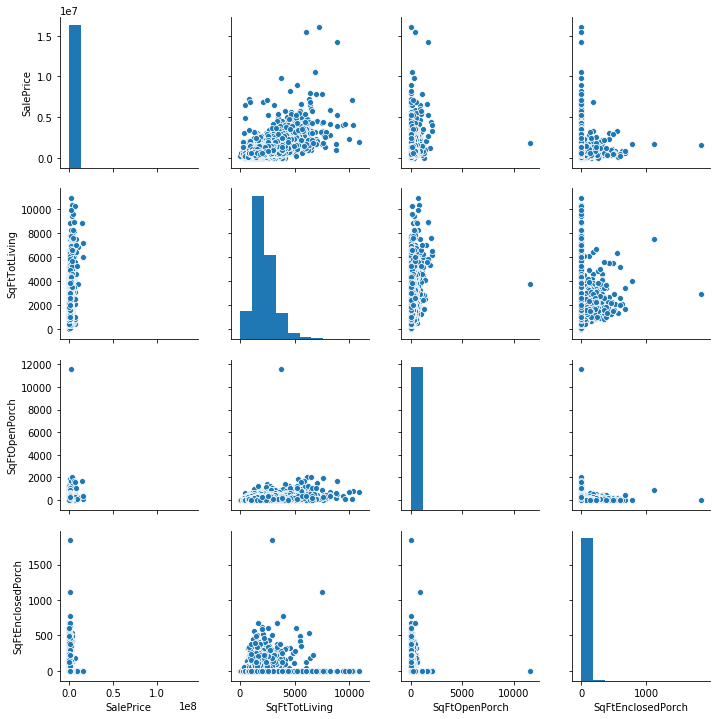

In [134]:
sns.pairplot(data= df_sale[['SalePrice', 'SqFtTotLiving', 'SqFtOpenPorch', 'SqFtEnclosedPorch']]);

In [135]:
df_sale.to_csv('Sales.csv')